## Coursera_Capstone(Car Accident Severity) - Week 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.image as mpimg
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv("C:/Users/RAJ BATHANI/Desktop/Coursera_Capstone/DataCollisions.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [6]:
#Converting Severity code from 1/2 to 0/1
severity_code = df['SEVERITYCODE'].values
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)
df["SEVERITYCODE"] = severity_code

In [7]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,0,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,0,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,0,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,1,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [9]:
#Descriptive statistic tests
descriptive_stats= df.describe(include="all")
#Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

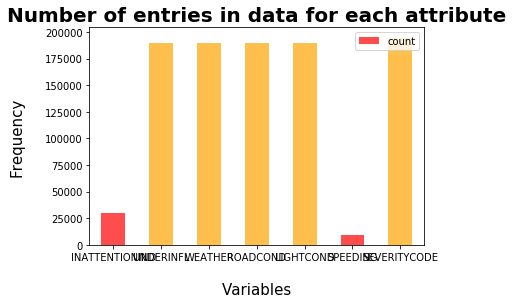

In [10]:
color_yo=['red','orange','orange','orange','orange','red','orange']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo])
plt.title('Number of entries in data for each attribute', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()

In [11]:
df['SEVERITYCODE'].values

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

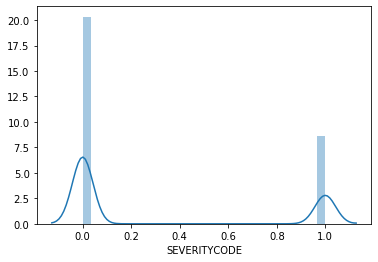

In [12]:
# Distribution of Target Variable
peng = df['SEVERITYCODE']
sns.distplot(peng)

In [13]:
addr = df['ADDRTYPE'].value_counts()
addr

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

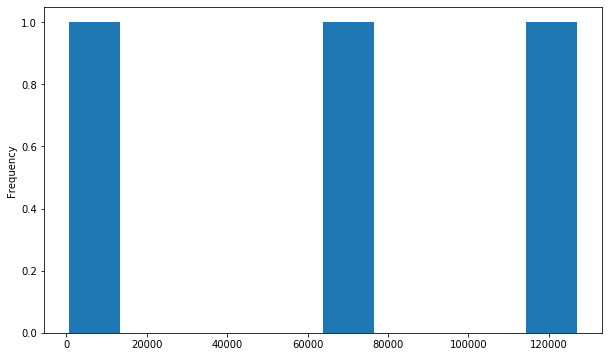

In [14]:
addtype=df['ADDRTYPE'].value_counts()
addtype.plot(kind='hist',
figsize=(10, 6))

In [15]:
#Cunting the IncKey unqiue numbers
df['INCKEY'].nunique()

194673

In [16]:
#Encoding in attention (0 = No, 1 = Yes)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

In [18]:
#Encoding Under the influence (0 = No, 1 = Yes)
df["UNDERINFL"].replace("N", 0, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

In [19]:
#Encoding Speeding(0 = No, 1 = Yes)
df["SPEEDING"].replace("Y", 1, inplace=True)
df["SPEEDING"].replace(np.nan, 0, inplace=True)

In [20]:
#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

In [21]:
#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
df["WEATHER"].replace("Clear", 0, inplace=True)
df["WEATHER"].replace("Raining", 3, inplace=True)
df["WEATHER"].replace("Overcast", 1, inplace=True)
df["WEATHER"].replace("Other", "Unknown", inplace=True)
df["WEATHER"].replace("Snowing", 3, inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

In [22]:
#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
df["ROADCOND"].replace("Dry", 0, inplace=True)
df["ROADCOND"].replace("Wet", 2, inplace=True)
df["ROADCOND"].replace("Ice", 2, inplace=True)
df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Standing Water", 2, inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df["ROADCOND"].replace("Oil", 2, inplace=True)

In [23]:
df.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,2,0,NaN,NaN,0.0,10,Entering at angle,0,0,N
1,0,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,2,1,NaN,6354039.0,0.0,11,From same direction - both going straight - bo...,0,0,N
2,0,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,0,0,NaN,4323031.0,0.0,32,One parked--one moving,0,0,N
3,0,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,0,0,NaN,NaN,0.0,23,From same direction - all others,0,0,N
4,1,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,2,0,NaN,4028032.0,0.0,10,Entering at angle,0,0,N
5,0,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,0,0,NaN,NaN,0.0,10,Entering at angle,0,0,N
6,0,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,2,0,NaN,8344002.0,0.0,10,Entering at angle,0,0,N
7,1,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,0,0,NaN,NaN,0.0,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,0,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,0,0,NaN,6166014.0,0.0,32,One parked--one moving,0,0,N
9,1,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,0,0,NaN,6079001.0,0.0,10,Entering at angle,0,0,N


In [24]:
ag = df.ADDRTYPE.unique()
ag
dt = df.ADDRTYPE.value_counts()
dt

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [25]:
df['ADDRTYPE'].replace(np.nan,'Intersection',inplace=True)

In [26]:
ad = df.ADDRTYPE.unique()
ad
dd = df.ADDRTYPE.value_counts()
dd

Block           126926
Intersection     66996
Alley              751
Name: ADDRTYPE, dtype: int64

<BarContainer object of 3 artists>

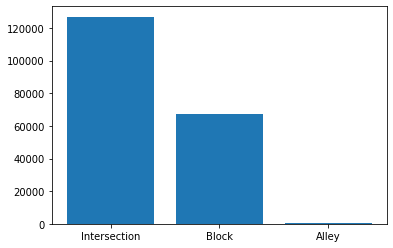

In [27]:
#Area type of accidents
plt.bar(ad,height=dd)

In [28]:
wt = df.WEATHER.value_counts()
wt

0          111135
3           34165
1           27719
Unknown     15923
2             650
Name: WEATHER, dtype: int64

In [29]:
we = df.ROADCOND.unique()
we


array([2, 0, nan, 'Unknown', 1], dtype=object)

In [30]:
#Creating new dataframe with Target Variable and Features
new_df=df[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]

In [31]:
new_df.head()

,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,-122.323148,47.703140,1307,0.0,0,1,2,0,0.0,1
1,-122.347294,47.647172,52200,0.0,0,3,2,1,0.0,0
2,-122.334540,47.607871,26700,0.0,0,1,0,0,0.0,0
3,-122.334803,47.604803,1144,0.0,0,0,0,0,0.0,0
4,-122.306426,47.545739,17700,0.0,0,3,2,0,0.0,1


In [32]:
final_df=new_df.copy()
final_df.dropna(axis=0,how='any',inplace=True)

In [33]:
final_stats=final_df.describe()

In [34]:
final_stats

,X,Y,INCKEY,INATTENTIONIND,SPEEDING,SEVERITYCODE
count,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000
mean,-122.330502,47.619544,138384.461586,0.158003,0.047278,0.304142
std,0.030018,0.056215,85503.159003,0.364745,0.212233,0.460045
min,-122.419091,47.495573,1001.000000,0.000000,0.000000,0.000000
25%,-122.348846,47.575884,68873.500000,0.000000,0.000000,0.000000
50%,-122.330168,47.615361,120488.000000,0.000000,0.000000,0.000000
75%,-122.311922,47.663835,199259.000000,0.000000,0.000000,1.000000
max,-122.238949,47.734142,331342.000000,1.000000,1.000000,1.000000


In [35]:
np.count_nonzero(final_df['UNDERINFL'])

86923

In [36]:
#Cleaning redudandant and misplaced values of Lightconditions
lightcondattr = final_df["LIGHTCOND"].size
finallightcond = final_df['LIGHTCOND'] == 'Unknown'
lightcond = final_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[finallightcond]
lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2
final_df.loc[final_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond
final_df["LIGHTCOND"]=final_df["LIGHTCOND"].astype(int)

In [37]:
#For Road Condition
roadcondsize = final_df["ROADCOND"].size
featureinroadcond = final_df['ROADCOND'] == 'Unknown'
roadcond = final_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]
roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2
final_df.loc[final_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
final_df["ROADCOND"]=final_df["ROADCOND"].astype(int)

In [38]:
#For Weather Condition
weathersize = final_df["WEATHER"].size
featureinweather = final_df ['WEATHER'] == 'Unknown'
weather = final_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]
weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3
final_df.loc[final_df.WEATHER == "Unknown", 'WEATHER'] = weather
final_df["WEATHER"]=final_df["WEATHER"].astype(int)

In [39]:
#Converting Speeding to Int
final_df["SPEEDING"]=final_df["SPEEDING"].astype(int)
#Converting unattentive of drivers to Int
final_df["INATTENTIONIND"]=final_df["INATTENTIONIND"].astype(int)
#Converting influence to Int
final_df["UNDERINFL"]=final_df["UNDERINFL"].astype(int)

In [40]:
#Grouping the dependent and Independent variabels
X=final_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=final_df[["SEVERITYCODE"]].values
#Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)


In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
# Balance the Data
os = SMOTE(random_state=0)
os_data_X, os_data_y= os.fit_sample(X_train, y_train)

In [43]:
#Decision Tree Clasifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(os_data_X,os_data_y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [44]:
#Make Prediction:
yhatDT = DT.predict(X_test)

In [45]:
#Check Accuracy
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, y_test))

Accuracy score for Decision Tree =  0.5760076740692476


In [46]:
#Visualization
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))
print(classification_report(yhatDT,y_test))

Confusion Matrix - Decision Tree
Predicted      0      1    All
True                          
0          24461  13984  38445
1           9442   7364  16806
All        33903  21348  55251
              precision    recall  f1-score   support

           0       0.64      0.72      0.68     33903
           1       0.44      0.34      0.39     21348

    accuracy                           0.58     55251
   macro avg       0.54      0.53      0.53     55251
weighted avg       0.56      0.58      0.56     55251



In [48]:
#COnfusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools

Confusion matrix, without normalization
[[ 7364  9442]
 [13984 24461]]


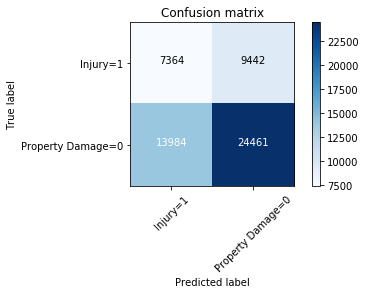

In [66]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,yhatDT, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Injury=1','Property Damage=0'],normalize=False,
                      title='Confusion matrix')


plt.show()

0.688822675678875
Accuracy 0.5888219217751715
              precision    recall  f1-score   support

           0       0.72      0.67      0.69     38445
           1       0.35      0.41      0.38     16806

    accuracy                           0.59     55251
   macro avg       0.53      0.54      0.53     55251
weighted avg       0.61      0.59      0.60     55251

Confusion matrix, without normalization
[[ 6846  9960]
 [12758 25687]]


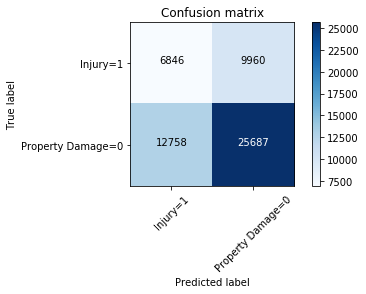

In [67]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(os_data_X,os_data_y)

yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print(log_loss(y_test, yhat_prob))

print ("Accuracy", accuracy_score(yhatLR,y_test))
print (classification_report(y_test, yhatLR))

cnf_matrix = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')